In [1]:
import pandas
from shap.plots import beeswarm, bar, scatter 
from shap import Explanation
import matplotlib.pyplot as pl
import numpy
import math

In [2]:
bs = 64
num_epochs = 100
prefix = 'sans_block'
T = 3

shap_df = pandas.read_csv(f'../../../results/{prefix}_bs={bs}_maxep={num_epochs}_rt/T={T}-shap_gradient.csv')

In [3]:
def is_accurate(r, t):
    if r[f'is_correct{t}'] == 1:
        return 1
    if r[f'is_wrong{t}'] == 1:
        return 0
    return numpy.nan


# Overall SHAP Plot

In [4]:
for time in range(T + 1):
    shap_df[f'is_accurate{time}'] = shap_df.apply(lambda row: is_accurate(row, time), axis=1)
    shap_df[f'is_accurate{time}_shap'] = shap_df[f'is_correct{time}_shap'] + shap_df[f'is_wrong{time}_shap']


In [5]:
columns = []
shap_columns = []
feature_names = []

for var, var_name, sep in [
    ('reward_vr_fx', 'Reward@VR>FX', '@'), 
    ('change_fx', 'Change@FX', '@'), 
    ('change_vr', 'Change@VR', '@'),
    ('side_probed', 'ProbedSide', '@'), 
    ('stimulus_time', 'StimulusDuration', '@'), 
    ('is_accurate', 'IsAccurate', '@'), 
    ('accrued_score', 'AccruedScore', 'Until'),
]:
    for time in range(T + 1):
        
        if time < T and var in ['stimulus_time', 'accrued_score']:
            continue
        
        col_name = f"{var}{time}"
        columns.append(col_name)
        shap_columns.append(col_name + '_shap')
        
        if T-time == 0:
            feature_names.append(f'{var_name} {sep} T   ')
        else:
            feature_names.append(f'{var_name} {sep} T-{T-time}')

columns.extend([
#     'sub_emb', 
#     'block_emb'
])
feature_names.extend([
#     'Subject', 
#     'Block'
])
shap_columns.extend([
#     'sub_shap', 
#     'block_shap'
])

print(shap_df[shap_columns].min().min())
print(shap_df[shap_columns].max().max())


-0.4281948452154174
0.4745666737747379


All-NaN slice encountered


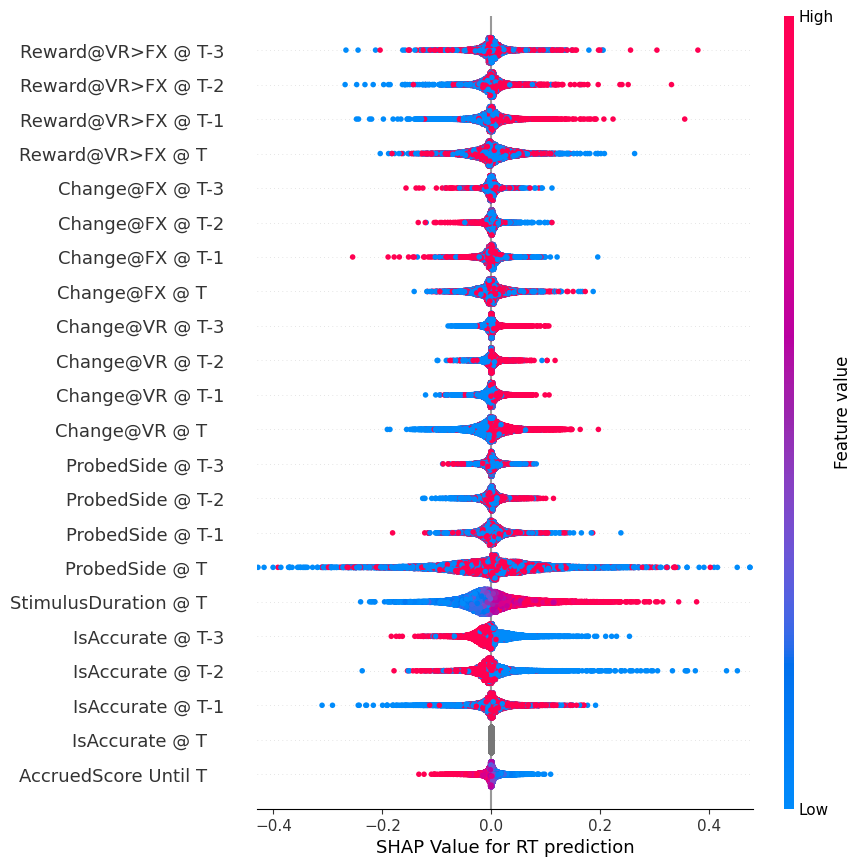

In [6]:
explanation = Explanation(values=shap_df[shap_columns].values,
                          feature_names=feature_names,
                          data=shap_df[columns].values)

numpy.random.seed(0)
beeswarm(explanation, show=False, color_bar=True,
         order=list(range(len(explanation.feature_names))),
         max_display=len(feature_names))
pl.xlim([-0.43, 0.48])
pl.xlabel("SHAP Value for RT prediction")
pl.show()

# Subject Wise SHAP Plot
Pending

# Other Effects

In [7]:
# scatter(explanation[:, 'StimulusDuration @ T   '], 
#         color=explanation[:, 'AccruedScore Until T   '],
#         show=False)
# pl.show()

# Feature Level - Summed across Time

In [8]:
# shap_columns = []
# feature_names = []

# for var, var_name in [
#     ('reward_vr_fx', 'Reward@VR>FX'), 
#     ('change_fx', 'Change@FX'), 
#     ('change_vr', 'Change@VR'),
#     ('side_probed', 'ProbedSide'), 
#     ('stimulus_time', 'StimulusDuration'), 
#     ('is_correct', 'IsCorrect'), 
#     ('is_wrong', 'IsWrong'),
#     ('accrued_score', 'AccruedScore'),
# ]:
#     shap_columns.append(var + '_shap')
#     feature_names.append(var_name)

# explanation = Explanation(values=shap_df[shap_columns].values,
#                       feature_names=feature_names)

# beeswarm(explanation, show=False,
#          order=list(range(len(explanation.feature_names))),
#          max_display=len(feature_names))
# pl.show()


# Time Level - Summed across Features

In [9]:
# shap_columns = []
# feature_names = []

# for time in range(0, T+1):
#     shap_columns.append(f't{time}_shap')
#     if T-time == 0:
#         feature_names.append(f'T   ')
#     else:
#         feature_names.append(f'T-{T-time}')

# print(shap_df[shap_columns].min().min())
# print(shap_df[shap_columns].max().max())


In [10]:
# explanation = Explanation(values=shap_df[shap_columns].values,
#                       feature_names=feature_names)

# beeswarm(explanation, show=False,
#          order=list(range(len(explanation.feature_names))),
#          max_display=len(feature_names))
# pl.xlim([-0.9, 0.65])
# pl.show()
